In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [3]:
#pip install scikit-learn pandas matplotlib

In [4]:
df = pd.read_csv("air-traffic-passenger-statistics.csv")

In [5]:
features = ['Passenger Count']

In [6]:
encoder = LabelEncoder()
df['Operating Airline'] = encoder.fit_transform(df['Operating Airline'])
X = df[features]

## Find the best number of clusters using the elbow method

In [7]:
inertia = []
silhouette = []
k_values = range(2, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X, kmeans.labels_))

## Plot the elbow curve

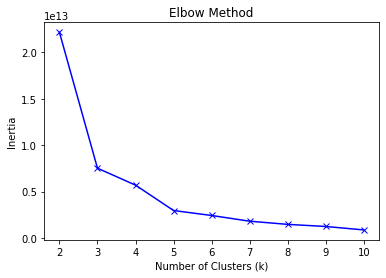

In [8]:
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## Plot the silhouette scores

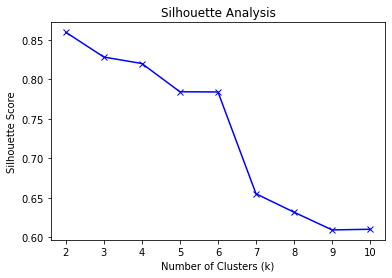

In [9]:
plt.plot(k_values, silhouette, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

## Choose the best k value based on the elbow curve and silhouette scores

In [10]:
best_k = np.argmin(inertia) + 2  

## Perform K-means clustering with the best k value

In [11]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=10, random_state=42)

## Add the cluster labels to the dataset

In [12]:
df['Cluster'] = kmeans.labels_

## Print the cluster centers

In [13]:
print("Cluster Centers:")
print(kmeans.cluster_centers_)

Cluster Centers:
[[  5657.74342284]
 [302411.58490566]
 [105794.49345794]
 [ 39913.38165939]
 [528388.5       ]
 [145009.34615385]
 [ 17341.16578616]
 [385742.578125  ]
 [ 67291.25460123]
 [217881.97058824]]


## Print the number of samples in each cluster

In [15]:
print("Samples per Cluster:")
print(df['Cluster'].value_counts())

Samples per Cluster:
0    11061
6     3976
3     1150
8      981
5      673
2      529
7      192
1      159
9      136
4       28
Name: Cluster, dtype: int64
